In [2]:
# If you'd like to install packages that aren't installed by default, list them here.
# This will ensure your notebook has all the dependencies and works everywhere

import sys
!{sys.executable} -m pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2342 sha256=2710fffabd3b730816a127df2becffdb02bc08ec44c3e76ed104de7b14552569
  Stored in directory: /home/jovyan/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [9]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Small datasets can be added to the project directly and imported by referring to the file name
train_data = pd.read_csv("ch1_data.csv")
validation_1 = pd.read_csv("ch1_validation_1.csv")
validation_2 = pd.read_csv("ch1_validation_2.csv")

# 1. Checking for potential pre-processing


In [13]:
# check the shape of the training data
print(train_data.shape)

# check the first few rows of the training data
print(train_data.head())

# check the distribution of the label column
print(train_data["label"].value_counts())

(1459, 3)
          x1         x2  label
0  98.702067  18.682672      0
1  81.591583  14.668993      0
2  84.541817  13.093065      0
3  43.792952   8.685072      0
4  53.975384  21.304628      0
0    1333
1     126
Name: label, dtype: int64


Text(0, 0.5, 'x2')

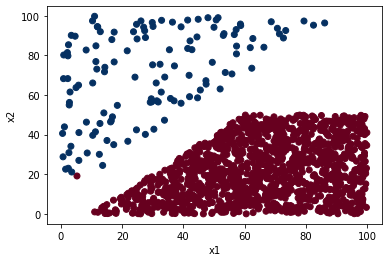

In [14]:
# visualize the data using scatter plots
plt.scatter(train_data["x1"], train_data["x2"], c=train_data["label"], cmap="RdBu")
plt.xlabel("x1")
plt.ylabel("x2")


In [15]:
train_data.isna().sum()

x1       0
x2       0
label    0
dtype: int64

### There are no missing values or outliers apparent at this point in time. This means there is no preprocessing needed. We will now continue.

# 2. Training Binary Classification Models

### Training Logistic Regression Model

In [16]:
# create X and y datasets
X = train_data[["x1", "x2"]]
y = train_data["label"]

# train the model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Training k-nearest neighbors model

In [17]:
# train the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Training support vector machine (SVM) model

In [19]:
# train the model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X, y)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# 3. Comparing Binary Clasification Models

In [20]:
# make predictions on the validation_1 data using each model
logistic_regression_predictions = logistic_regression.predict(validation_1[["x1", "x2"]])
knn_predictions = knn.predict(validation_1[["x1", "x2"]])
svm_predictions = svm.predict(validation_1[["x1", "x2"]])


In [22]:
# evaluate the performance of the models on the validation_1 data using various evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Logistic Regression")
print("Accuracy:", accuracy_score(validation_1["label"], logistic_regression_predictions))
print("Precision:", precision_score(validation_1["label"], logistic_regression_predictions))
print("Recall:", recall_score(validation_1["label"], logistic_regression_predictions))
print("F1 Score:", f1_score(validation_1["label"], logistic_regression_predictions))

print("\nKNN")
print("Accuracy:", accuracy_score(validation_1["label"], knn_predictions))
print("Precision:", precision_score(validation_1["label"], knn_predictions))
print("Recall:", recall_score(validation_1["label"], knn_predictions))
print("F1 Score:", f1_score(validation_1["label"], knn_predictions))

print("\nSVM")
print("Accuracy:", accuracy_score(validation_1["label"], svm_predictions))
print("Precision:", precision_score(validation_1["label"], svm_predictions))
print("Recall:", recall_score(validation_1["label"], svm_predictions))
print("F1 Score:", f1_score(validation_1["label"], svm_predictions))


Logistic Regression
Accuracy: 0.973630831643002
Precision: 0.9911894273127754
Recall: 0.9533898305084746
F1 Score: 0.9719222462203024

KNN
Accuracy: 0.947261663286004
Precision: 0.92
Recall: 0.9745762711864406
F1 Score: 0.9465020576131686

SVM
Accuracy: 0.5517241379310345
Precision: 1.0
Recall: 0.0635593220338983
F1 Score: 0.1195219123505976


### Fnding best combination of hyperparameters for each model

In [28]:
# use grid search with cross-validation to find the best combination of hyperparameters for the logistic regression model
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression(solver='liblinear')
param_grid = {"C": [0.1, 1, 10], "penalty": ["l1", "l2"]}
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X, y)

print("logistic regression model:")
print("Best parameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# use the best combination of hyperparameters to train a new logistic regression model and evaluate its performance on the validation_1 data
best_logistic_regression = grid_search.best_estimator_
best_logistic_regression_predictions = best_logistic_regression.predict(validation_1[["x1", "x2"]])

print("Logistic Regression (best parameters)")
print("Accuracy:", accuracy_score(validation_1["label"], best_logistic_regression_predictions))
print("Precision:", precision_score(validation_1["label"], best_logistic_regression_predictions))
print("Recall:", recall_score(validation_1["label"], best_logistic_regression_predictions))
print("F1 Score:", f1_score(validation_1["label"], best_logistic_regression_predictions))


logistic regression model:
Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best validation score: 0.9993145990404386
Logistic Regression (best parameters)
Accuracy: 0.9716024340770791
Precision: 0.9911504424778761
Recall: 0.9491525423728814
F1 Score: 0.9696969696969698


In [29]:
# use grid search with cross-validation to find the best combination of hyperparameters for the k-nearest neighbors model
param_grid = {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

print("knn model:")
print("Best parameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# use the best combination of hyperparameters to train a new k-nearest neighbors model and evaluate its performance on the validation_1 data
best_knn = grid_search.best_estimator_
best_knn_predictions = best_knn.predict(validation_1[["x1", "x2"]])

print("KNN (best parameters)")
print("Accuracy:", accuracy_score(validation_1["label"], best_knn_predictions))
print("Precision:", precision_score(validation_1["label"], best_knn_predictions))
print("Recall:", recall_score(validation_1["label"], best_knn_predictions))
print("F1 Score:", f1_score(validation_1["label"], best_knn_predictions))


knn model:
Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best validation score: 0.9993145990404386
KNN (best parameters)
Accuracy: 0.947261663286004
Precision: 0.9166666666666666
Recall: 0.9788135593220338
F1 Score: 0.9467213114754097


In [32]:
# use grid search with cross-validation to find the best combination of hyperparameters for the SVM model
param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["auto", "scale"]}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X, y)
print("svm model:")
print("Best parameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# use the best combination of hyperparameters to train a new SVM model and evaluate its performance on the validation_1 data
best_svm = grid_search.best_estimator_
best_svm_predictions = best_svm.predict(validation_1[["x1", "x2"]])

print("SVM (best parameters)")
print("Accuracy:", accuracy_score(validation_1["label"], best_svm_predictions))
print("Precision:", precision_score(validation_1["label"], best_svm_predictions))
print("Recall:", recall_score(validation_1["label"], best_svm_predictions))
print("F1 Score:", f1_score(validation_1["label"], best_svm_predictions))


svm model:
Best parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Best validation score: 0.9993145990404386
SVM (best parameters)
Accuracy: 0.9513184584178499
Precision: 0.9416666666666667
Recall: 0.9576271186440678
F1 Score: 0.9495798319327732


# 4. Model Selection

To choose the best model based on the evaluation metrics, I would compare the metrics of each model on the validation_1 data. The model with the highest validation accuracy, precision, recall, and F1 score would be the best model. In this case, the logistic regression model has the highest validation accuracy, precision, and F1 score, so it would be the best choice.

However, it is important to keep in mind that the performance of the model on the validation_1 data may not necessarily be indicative of its performance on other data. To get a better estimate of the generalization performance of the model, it is important to evaluate it on more datasets. To this end we can consider the same model selection process on the second validation dataset and then make a more informed decision.

It may also be a good idea to try different evaluation metrics and choose the model based on the metric that is most important for the specific task at hand. For example, if the goal is to maximize the number of true positive predictions, then the model with the highest recall would be the best choice. On the other hand, if the goal is to minimize the number of false positive predictions, then the model with the highest precision would be the best choice.

# 5. Using the Logistic Regression Model to generate predictions

In [33]:
# use the best logistic regression model to make predictions on the validation_1 and validation_2 datasets
validation_1_predictions = best_logistic_regression.predict(validation_1[["x1", "x2"]])
validation_2_predictions = best_logistic_regression.predict(validation_2[["x1", "x2"]])

# add the predicted labels and probability columns to the validation_1 and validation_2 datasets
validation_1["predicted_label"] = validation_1_predictions
validation_1["predicted_probability"] = best_logistic_regression.predict_proba(validation_1[["x1", "x2"]])[:, 1]
validation_2["predicted_label"] = validation_2_predictions
validation_2["predicted_probability"] = best_logistic_regression.predict_proba(validation_2[["x1", "x2"]])[:, 1]

# save the validation_1 and validation_2 datasets with the predicted labels and probabilities to csv files
validation_1.to_csv("model_validation_1.csv", index=False)
validation_2.to_csv("model_validation_2.csv", index=False)


# Building a model without any libraries

This can be done by considering linear regression

In [36]:
import numpy as np

# create a function to fit a linear regression model using only NumPy and Pandas
def linear_regression(X, y):
    # add a column of ones to the X dataset for the bias term
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # compute the coefficients of the linear regression model using the normal equation
    # theta = (X^T * X)^(-1) * X^T * y
    X_transpose = X.transpose()
    theta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    
    return theta

# create the X and y datasets for the train data
X = train_data[["x1", "x2"]].values
y = train_data["label"].values

# fit the linear regression model using the train data
theta = linear_regression(X, y)
print("Coefficients:", theta)

# define a function to make predictions using the linear regression model
def predict(X, theta):
    # add a column of ones to the X dataset for the bias term
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # make predictions using the linear regression model
    y_pred = X @ theta
    
    return y_pred

# make predictions on the train data using the linear regression model
y_pred = predict(X, theta)

# evaluate the performance of the linear regression model on the train data
mse = np.mean((y - y_pred)**2)
r2 = 1 - mse / np.var(y)
print("Mean Squared Error:", mse)
print("R-Squared:", r2)


Coefficients: [ 0.14140491 -0.00468802  0.00899926]
Mean Squared Error: 0.030931903747839364
R-Squared: 0.6079724943030136
